Project Name : Diabetes Prediction

In [2]:
#Import Necessary Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [4]:
#Read DataSet

In [5]:
dataset = pd.read_csv("./diabetes_prediction_dataset.csv")

In [6]:
#Our data Set has 1 Lac Example points and Nine Features in total
print("Our Data Dimentions: ", dataset.shape)
#We have a total of 9 Lac Values in our dataset
print("Total Values: ", dataset.size)

Our Data Dimentions:  (100000, 9)
Total Values:  900000


In [7]:
#First 8 features are independent (Input features) and the last feature is dependent which is our actual output
dataset.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
#Let's Write down the steps of a Machine Learning Model Training
#1.Data Preprocessing
#2.Model Selection
#3.Training the data
#4.Model Evaluation/Testing Model
#5.Improvement
#6.Deployment


In [9]:
#First Of all Let's Check If our data has Any Missing Values

In [10]:
dataset.isnull().values.any() #No Missing Values

False

In [11]:
#Now Let's check the values of each column one by one and also check if any column has any outliers

- Column 1 ----> Gender

In [12]:
unique_values = dataset['gender'].unique()
print(unique_values)

column = dataset['gender']
value_counts = column.value_counts()

print("Percentage of Males: ", (value_counts['Male'] / len(dataset)) * 100)
print("Percentage of Females: ", (value_counts['Female'] / len(dataset)) * 100)
print("Percentage of Other: ", (value_counts['Other'] / len(dataset)) * 100)

['Female' 'Male' 'Other']
Percentage of Males:  41.43
Percentage of Females:  58.55200000000001
Percentage of Other:  0.018000000000000002


- Column 2 ----> Age

[ 0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88  1.
  1.08  1.16  1.24  1.32  1.4   1.48  1.56  1.64  1.72  1.8   1.88  2.
  3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.   14.
 15.   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.   26.
 27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.   38.
 39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.   50.
 51.   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.   62.
 63.   64.   65.   66.   67.   68.   69.   70.   71.   72.   73.   74.
 75.   76.   77.   78.   79.   80.  ]

-----To see the Outliers: 


<AxesSubplot:>

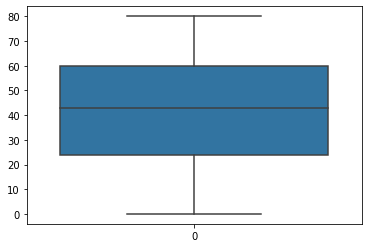

In [13]:
unique_values = np.sort(dataset['age'].unique())
print(unique_values)
column = dataset['age']
print("\n-----To see the Outliers: ")
sns.boxplot(data=column)

- Column 3 -----> Hypertension

In [14]:
unique_values = dataset['hypertension'].unique()
print(unique_values)

column = dataset['hypertension']
value_counts = column.value_counts()

print("Percentage of 0's: ", (value_counts[0] / len(dataset)) * 100)
print("Percentage of 1's: ", (value_counts[1] / len(dataset)) * 100)

[0 1]
Percentage of 0's:  92.515
Percentage of 1's:  7.485


- Column 4 ------> Heart Disease

In [15]:
#As it is  a boolean column it may not provide useful insights using box plots
unique_values = dataset['heart_disease'].unique()
print(unique_values)

column = dataset['heart_disease']
value_counts = column.value_counts()

print("Percentage of 0's: ", (value_counts[0] / len(dataset)) * 100)
print("Percentage of 1's: ", (value_counts[1] / len(dataset)) * 100)

[1 0]
Percentage of 0's:  96.05799999999999
Percentage of 1's:  3.9419999999999997


- Column 5 ------> Smoking History

In [16]:
unique_values = dataset['smoking_history'].unique()
print(unique_values)

column = dataset['smoking_history']
value_counts = column.value_counts()

print("\n\nPercentage of Never: ", (value_counts['never'] / len(dataset)) * 100 )
print("Percentage of No Info: ", (value_counts['No Info'] / len(dataset)) * 100 )
print("Percentage of Current: ", (value_counts['current'] / len(dataset)) * 100 )
print("Percentage of Former: ", (value_counts['former'] / len(dataset)) * 100 )
print("Percentage of Ever: ", (value_counts['ever'] / len(dataset)) * 100 )
print("Percentage of Not Current: ", (value_counts['not current'] / len(dataset)) * 100 )

['never' 'No Info' 'current' 'former' 'ever' 'not current']


Percentage of Never:  35.095
Percentage of No Info:  35.815999999999995
Percentage of Current:  9.286
Percentage of Former:  9.352
Percentage of Ever:  4.004
Percentage of Not Current:  6.447


- Column 6 -----> BMI

[10.01 10.08 10.14 ... 91.82 95.22 95.69]

-----To see the Outliers: 


<AxesSubplot:>

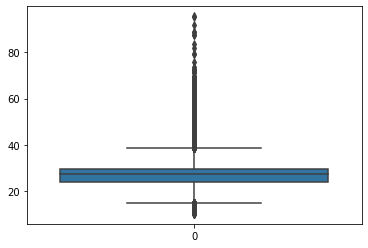

In [17]:
unique_values = np.sort(dataset['bmi'].unique())
print(unique_values)

print("\n-----To see the Outliers: ")
column = dataset['bmi']
sns.boxplot(data=column)


Lets Remove Outliers


<AxesSubplot:>

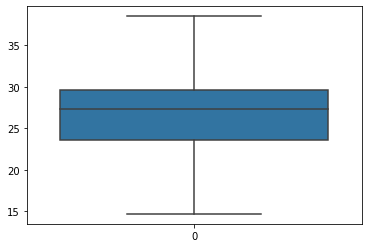

In [18]:
print("\nLets Remove Outliers")
column = dataset['bmi']

Q1 = column.quantile(0.25)
Q3 = column.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

column = np.where(column < lower_bound, lower_bound, column)
column = np.where(column > upper_bound, upper_bound, column)

dataset['bmi'] = column
sns.boxplot(data=column)


#filtered_column = column[(column >= lower_bound) & (column <= upper_bound)]

#sns.boxplot(data=filtered_column)

- Column 7 ------> HbA1c_level	

[3.5 4.  4.5 4.8 5.  5.7 5.8 6.  6.1 6.2 6.5 6.6 6.8 7.  7.5 8.2 8.8 9. ]

-----To see the Outliers: 


<AxesSubplot:>

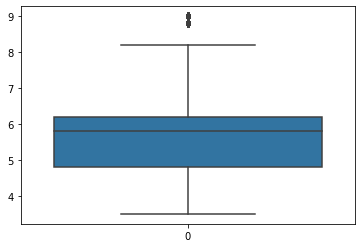

In [19]:
unique_values = np.sort(dataset['HbA1c_level'].unique())
print(unique_values)

print("\n-----To see the Outliers: ")
column = dataset['HbA1c_level']
sns.boxplot(data=column)


Lets Remove Outliers


<AxesSubplot:>

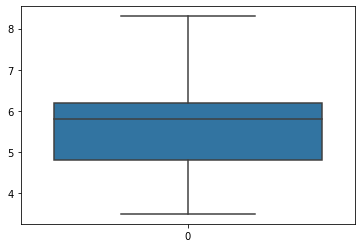

In [20]:
print("\nLets Remove Outliers")
column = dataset['HbA1c_level']

Q1 = column.quantile(0.25)
Q3 = column.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

column = np.where(column < lower_bound, lower_bound, column)
column = np.where(column > upper_bound, upper_bound, column)

dataset['HbA1c_level'] = column
sns.boxplot(data=column)

#filtered_column = column[(column >= lower_bound) & (column <= upper_bound)]
#dataset['HbA1c_level'] = filtered_column
#sns.boxplot(data=filtered_column)

- Column 8 -------> Blood Glucose Level	

[ 80  85  90 100 126 130 140 145 155 158 159 160 200 220 240 260 280 300]

-----To see the Outliers: 


<AxesSubplot:>

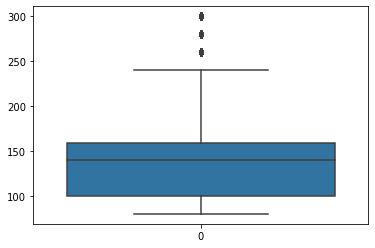

In [21]:
unique_values = np.sort(dataset['blood_glucose_level'].unique())
print(unique_values)

print("\n-----To see the Outliers: ")
column = dataset['blood_glucose_level']
sns.boxplot(data=column)


Lets Remove Outliers


<AxesSubplot:>

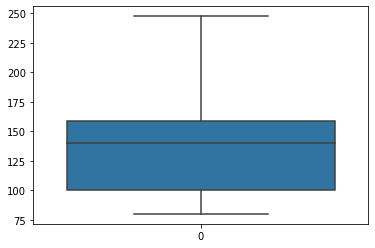

In [22]:
print("\nLets Remove Outliers")
column = dataset['blood_glucose_level']

Q1 = column.quantile(0.25)
Q3 = column.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

column = np.where(column < lower_bound, lower_bound, column)
column = np.where(column > upper_bound, upper_bound, column)

dataset['blood_glucose_level'] = column
sns.boxplot(data=column)

#filtered_column = column[(column >= lower_bound) & (column <= upper_bound)]
#dataset['blood_glucose_level'] = filtered_column
#sns.boxplot(data=filtered_column)

- Column 9 -------> Diabetes

In [23]:
unique_values = np.sort(dataset['diabetes'].unique())
print(unique_values)

column = dataset['diabetes']
value_counts = column.value_counts()

print("Percentage of 0's: ", (value_counts[0] / len(dataset)) * 100)
print("Percentage of 1's: ", (value_counts[1] / len(dataset)) * 100)

[0 1]
Percentage of 0's:  91.5
Percentage of 1's:  8.5


# Correlation

In [24]:
dataset.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.380410,0.097098,0.102481,0.258008
hypertension,0.251171,1.000000,0.121262,0.151447,0.077573,0.078007,0.197823
heart_disease,0.233354,0.121262,1.000000,0.069390,0.064703,0.064398,0.171727
bmi,0.380410,0.151447,0.069390,1.000000,0.078333,0.083048,0.209656
HbA1c_level,0.097098,0.077573,0.064703,0.078333,1.000000,0.147483,0.384753
blood_glucose_level,0.102481,0.078007,0.064398,0.083048,0.147483,1.000000,0.386446
diabetes,0.258008,0.197823,0.171727,0.209656,0.384753,0.386446,1.000000


# Logistic Regression

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
numerical_columns = ['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']
output = ['diabetes']
categorical_columns = ['gender', 'smoking_history']

dataset_subset = dataset[categorical_columns]
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(dataset_subset)
encoded_feature_names = encoder.get_feature_names(categorical_columns)
encoded_dataset = pd.DataFrame(encoded_columns, columns=encoded_feature_names)

X_numerical = dataset[numerical_columns]
X_encoded = pd.concat([encoded_dataset, X_numerical], axis=1)

y = dataset[output].values.ravel()

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_encoded, y, test_size=0.3, random_state=10)

In [27]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [28]:
y_train_2 = y_train_2.ravel()
y_test_2 = y_test_2.ravel()

lr_model = LogisticRegression(max_iter=3000)
lr_model.fit(X_train_2, y_train_2)

LogisticRegression(max_iter=3000)

In [31]:
y_pred_2 = lr_model.predict(X_test_2)

print("Prediction on Testing set:", y_pred_2)

Prediction on Testing set: [0 0 0 ... 0 0 0]


In [33]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import accuracy_score
precision = precision_score(y_test_2, y_pred_2)
print("Precision:", precision)

recall = recall_score(y_test_2, y_pred_2)
print("Recall:", recall)

cm = confusion_matrix(y_test_2, y_pred_2)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test_2, y_pred_2)
print("Accuracy on Decision Tree:", accuracy)

Precision: 0.8587479935794543
Recall: 0.6294117647058823
Confusion Matrix:
[[27186   264]
 [  945  1605]]
Accuracy on Decision Tree: 0.9597


# Naive Bayes

In [34]:
numerical_columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_columns = ['gender', 'smoking_history']
output = ['diabetes']
dataset_subset = dataset[categorical_columns]
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(dataset_subset)
encoded_feature_names = encoder.get_feature_names(categorical_columns)
encoded_dataset = pd.DataFrame(encoded_columns, columns=encoded_feature_names)

X_numerical = dataset[numerical_columns]
X_encoded = pd.concat([encoded_dataset, X_numerical], axis=1)

y = dataset[output].values.ravel()

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_encoded, y, test_size=0.3, random_state=10)

In [36]:
from sklearn.naive_bayes import GaussianNB
y_train_3 = y_train_3.ravel()
y_test_3 = y_test_3.ravel()

nb_model = GaussianNB()
nb_model.fit(X_train_3, y_train_3)

GaussianNB()

In [37]:
y_pred_3 = nb_model.predict(X_test_3)

In [38]:
precision = precision_score(y_test_3, y_pred_3)
print("Precision:", precision)

recall = recall_score(y_test_3, y_pred_3)
print("Recall:", recall)

cm = confusion_matrix(y_test_3, y_pred_3)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test_3, y_pred_3)
print("Accuracy on Naive Bayes Model:", accuracy)

Precision: 0.34459347574101673
Recall: 0.816078431372549
Confusion Matrix:
[[23492  3958]
 [  469  2081]]
Accuracy on Naive Bayes Model: 0.8524333333333334


# Decision Tree

In [39]:
numerical_columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_columns = ['gender', 'smoking_history']
output = ['diabetes']

dataset_subset = dataset[categorical_columns]
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(dataset_subset)
encoded_feature_names = encoder.get_feature_names(categorical_columns)
encoded_dataset = pd.DataFrame(encoded_columns, columns=encoded_feature_names)

X_numerical = dataset[numerical_columns]
X_encoded = pd.concat([encoded_dataset, X_numerical], axis=1)

y = dataset[output].values.ravel()

In [40]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_encoded, y, test_size=0.3, random_state=10)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_4, y_train_4)

y_pred_4 = dt_model.predict(X_test_4)

precision = precision_score(y_test_4, y_pred_4)
print("Precision:", precision)

recall = recall_score(y_test_4, y_pred_4)
print("Recall:", recall)

cm = confusion_matrix(y_test_4, y_pred_4)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test_4, y_pred_4)
print("Accuracy on Decision Tree:", accuracy)

Precision: 0.7077897875512486
Recall: 0.7447058823529412
Confusion Matrix:
[[26666   784]
 [  651  1899]]
Accuracy on Decision Tree: 0.9521666666666667


# KNN K-Nearest Neighbours

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_encoded, y, test_size=0.3, random_state=10)

knn_model = KNeighborsClassifier()

knn_model.fit(X_train_5, y_train_5)

y_pred_5 = knn_model.predict(X_test_5)

In [43]:
precision = precision_score(y_test_5, y_pred_5)
print("Precision:", precision)

recall = recall_score(y_test_5, y_pred_5)
print("Recall:", recall)

cm = confusion_matrix(y_test_5, y_pred_5)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test_5, y_pred_5)
print("Accuracy on Decision Tree:", accuracy)

Precision: 0.8626716604244694
Recall: 0.5419607843137255
Confusion Matrix:
[[27230   220]
 [ 1168  1382]]
Accuracy on Decision Tree: 0.9537333333333333
